#Imports

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Initialising the dataset

The dataset is initialised with 2000 samples(`n_samples`), a `noise level` of 0.2 to slightly increase the variability in the dataset and make the plot more visually interesting, and a `random_state` initialisation to remove randomness in the produced image. The dataset is further divided in a train and test subparts.

In [43]:
X, y = make_moons(n_samples=2000, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0,
)

##Plotting the train and test splits

Text(0.5, 1.0, 'Test')

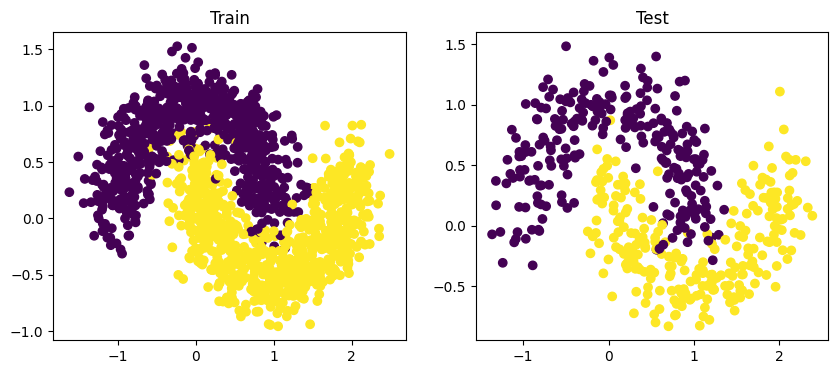

In [58]:
_, axes = plt.subplots(1, 2, figsize=(10, 4))
ax_train, ax_test = axes

ax_train.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
ax_test.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

ax_train.set_title('Train')
ax_test.set_title('Test')

#HistGradientBoostingClassifier

Training a `HistGradientBoostingClassifier` with the training data.

In [35]:
clf = HistGradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")

Accuracy: 96.8%


#Plotting the decision boundaries

Plotting the decision boundary gives us useful information about how the decision to classify a data point to one or another class is made.

Code inspiration from [the documentation.](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)

With the exception of a few data points, we can see that the decision boundary represents the data accurately. The HistGradientBoostingClassifier is a good choice for the classification task. In the plot below, the chosen target response is "predict". It makes a prediction for every sample.

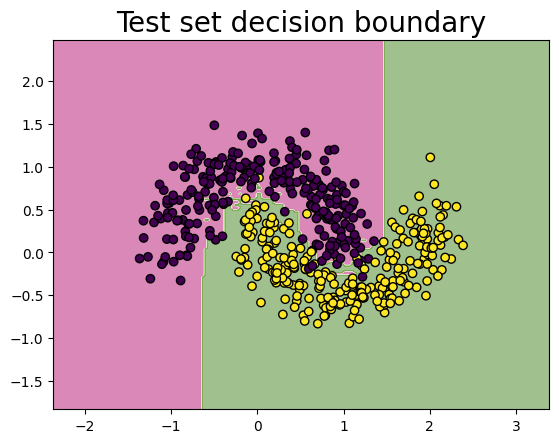

In [49]:
cm = plt.cm.PiYG
disp1 = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    alpha = 0.5,
    cmap=cm,
    response_method="predict",
    grid_resolution = 200,
)
disp1.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="black")
disp1.ax_.set_title('Test set decision boundary', fontsize=20)
plt.show()

Visualising with the `decision function` as the target response, we are able to infer a bit more information. While `predict` as a target would make a definitive choice for each sample, in this case we get a more granulated response. If we were to have data with that would contain a prominent outliers, this view would enable us to detect and analyse them.


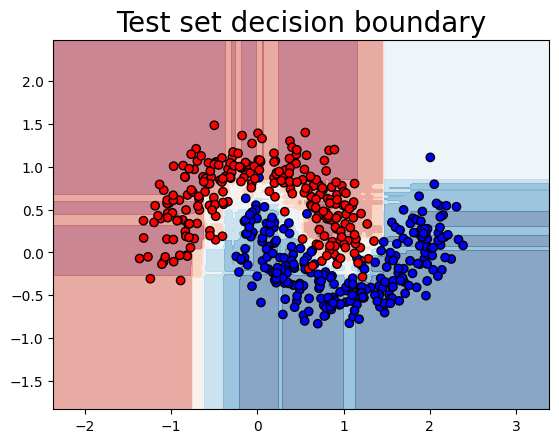

In [59]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

disp2 = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    cmap=cm,
    alpha = 0.5,
    grid_resolution=200,
    response_method="decision_function",
)
disp2.ax_.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=cm_bright,
    edgecolor="k",
)
disp2.ax_.set_title('Test set decision boundary', fontsize=20)
plt.show()